## Problem Statement:
   Inflation can be defined as the loss of purchasing power of a flat currency over a period of time.
   It plays akey role in designing the macro economic policy of central banks across the world. During period of high growth rate,inflation rises and during periods of lowor negative growth rates,deflation takes place.
   
   We undertook a study to find out the correlation inflation and CPI(Consumer Price Index).We have implemented various machine learning algorithms to find out pattern of rate of inflation over the time.Finally by using Karl Pearsons coefficient we have been successful in finding out top 5 factors which has affected inflation.
   
   
   


In [1]:
#importing libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import linear_model

### we have three datasets:
### 1.) urban cpi (related variables-- df,X_train,y_train, clf, reg,etc...)
### 2.) Rural cpi  (related variables-- df1,X_train1,y_train1, clf1, reg1,etc...)
### 3.) urban + rural cpi (related variables-- df2,X_train2,y_train2, clf2, reg2,etc...)   

In [3]:
df= pd.read_csv("urbancpi.csv")
df.head()

,Sector,Year,Month,Cereals_and_products,Meat_and_fish,Egg,Milk_and_products,Oils_and_fats,Fruits,Vegetables,...,Housing,Fuel_and_light,Household_goods_ and_services,Health,Transport_and_ communication,Recreation_and _amusement,Education,Personal_care_and_effects,Miscellaneous,General_index
0,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
1,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
2,Urban,2013,March,113.9,111.4,113.2,104.3,102.7,104.9,103.8,...,100.4,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0
3,Urban,2013,April,114.6,113.4,106.0,104.7,102.1,109.5,109.7,...,100.5,106.4,106.5,105.7,105.0,104.0,105.2,103.2,105.1,105.7
4,Urban,2013,May,115.4,114.2,102.7,105.5,101.5,110.6,123.7,...,100.5,107.2,107.1,106.2,103.9,104.6,105.7,102.6,104.9,106.6


displaying CPI data for URBAN SECTOR

displaying CPI data for RURAL sector

In [4]:
df1= pd.read_csv("ruralcpi1.csv")
df1.head()

,Sector,Year,Month,Cereals_and_products,Meat_and_fish,Egg,Milk_and_products,Oils_and_fats,Fruits,Vegetables,...,Housing,Fuel_and_light,Household_goods_ and_services,Health,Transport_and_ communication,Recreation_and _amusement,Education,Personal_care_and_effects,Miscellaneous,General_index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
2,Rural,2013,March,110.2,108.8,109.9,105.6,106.2,105.7,101.4,...,NaN,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0
3,Rural,2013,April,110.2,109.5,106.9,106.3,105.7,108.3,103.4,...,NaN,106.5,106.1,105.1,104.4,104.5,104.8,102.7,104.6,106.4
4,Rural,2013,May,110.9,109.8,105.9,107.5,105.3,108.1,107.3,...,NaN,107.5,106.8,105.7,104.1,105.0,105.5,102.1,104.8,107.2


In [5]:
df2= pd.read_csv("urbanruralcpi.csv")
df2.head()

,Sector,Year,Month,Cereals_and_products,Meat_and_fish,Egg,Milk_and_products,Oils_and_fats,Fruits,Vegetables,...,Housing,Fuel_and_light,Household_goods_ and_services,Health,Transport_and_ communication,Recreation_and _amusement,Education,Personal_care_and_effects,Miscellaneous,General_index
0,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
1,Rural+Urban,2013,February,110.4,110.2,112.8,104.9,105.5,103.6,103.2,...,100.4,106.0,105.2,104.5,104.2,103.6,103.9,104.5,104.4,105.3
2,Rural+Urban,2013,March,111.4,109.7,111.2,105.1,104.9,105.3,102.2,...,100.4,106.1,105.6,104.9,105.1,103.7,104.0,104.3,104.7,105.5
3,Rural+Urban,2013,April,111.6,110.9,106.6,105.7,104.4,108.9,105.5,...,100.5,106.5,106.3,105.3,104.7,104.2,105.0,102.9,104.8,106.1
4,Rural+Urban,2013,May,112.3,111.3,104.7,106.8,103.9,109.3,112.9,...,100.5,107.4,106.9,105.9,104.0,104.8,105.6,102.3,104.8,106.9


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import linear_model

In [7]:
# label encoding , i.e. converting string data to numerical  data 

le_sector=LabelEncoder()
le_year=LabelEncoder()
le_month=LabelEncoder()
inputs=df

inputs1=df1

inputs2=df2

inputs['sector_n']=le_sector.fit_transform(inputs['Sector'])
inputs['year_n']=le_sector.fit_transform(inputs['Year'])
inputs['month_n']=le_sector.fit_transform(inputs['Month'])
inputs_n=inputs.drop(['Sector','Year','Month'],axis='columns')

inputs1['sector_n']=le_sector.fit_transform(inputs1['Sector'])
inputs1['year_n']=le_sector.fit_transform(inputs1['Year'])
inputs1['month_n']=le_sector.fit_transform(inputs1['Month'])
inputs_n1=inputs1.drop(['Sector','Year','Month'],axis='columns')

inputs2['sector_n']=le_sector.fit_transform(inputs2['Sector'])
inputs2['year_n']=le_sector.fit_transform(inputs2['Year'])
inputs2['month_n']=le_sector.fit_transform(inputs2['Month'])
inputs_n2=inputs2.drop(['Sector','Year','Month'],axis='columns')

In [8]:
inputs_n['sector_n']=inputs_n['sector_n'].astype(float)
inputs_n['General_index']=inputs_n['General_index'].astype(float)
inputs_n['year_n']=inputs_n['year_n'].astype(float)
inputs_n['month_n']=inputs_n['month_n'].astype(float)
#print(inputs_n.head())

inputs_n1['sector_n']=inputs_n['sector_n'].astype(float)
inputs_n1['General_index']=inputs_n['General_index'].astype(float)
inputs_n1['year_n']=inputs_n['year_n'].astype(float)
inputs_n1['month_n']=inputs_n['month_n'].astype(float)
#print(inputs_n1.head())

inputs_n2['sector_n']=inputs_n2['sector_n'].astype(float)
inputs_n2['General_index']=inputs_n2['General_index'].astype(float)
inputs_n2['year_n']=inputs_n2['year_n'].astype(float)
inputs_n2['month_n']=inputs_n2['month_n'].astype(float)
#print(inputs_n2.head())

In [9]:
data=inputs_n.values

dividing the dataa into training and testing set

In [10]:
# splitting of Datasets into training and testing data
X_train, X_test, y_train, y_test = train_test_split(inputs[['year_n','month_n']],inputs_n.General_index,test_size=0.25)

X_train1, X_test1, y_train1, y_test1 = train_test_split(inputs1[['year_n','month_n']],inputs_n1.General_index,test_size=0.25)

X_train2, X_test2, y_train2, y_test2 = train_test_split(inputs2[['year_n','month_n']],inputs_n2.General_index,test_size=0.25)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)


In [11]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(48, 2) (48,) (16, 2) (16,)


In [12]:
X_train

,year_n,month_n
59,4,2
48,4,4
11,0,2
3,0,0
38,3,7
16,1,8
55,4,1
57,4,10
22,1,9
41,3,6


In [13]:
y_train

59    134.1
48    127.8
11    113.3
3     105.7
38    123.8
16    115.6
55    132.7
57    133.5
22    119.0
41    128.1
15    114.7
12    112.9
50    128.7
23    118.4
51    129.1
34    124.6
60    134.1
37    123.8
61    134.0
49    128.2
45    128.6
63    134.8
6     111.4
30    122.4
10    115.0
0     104.0
46    128.5
47    127.6
35    124.0
29    121.7
13    113.1
31    123.2
9     114.0
52    129.3
2     105.0
25    118.7
42    129.0
44    128.0
18    118.9
28    120.7
1     104.7
17    116.4
58    134.8
56    132.4
19    119.9
62    134.0
20    119.2
39    125.3
Name: General_index, dtype: float64

USING RIDGE REGRESSION:

In [14]:
#ridge regresssion 

clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train) 
predictions= clf.predict(X_test)

clf1 = Ridge(alpha=1.0)
clf1.fit(X_train1, y_train1) 
predictions1= clf1.predict(X_test1)

clf2 = Ridge(alpha=1.0)
clf2.fit(X_train2, y_train2) 
predictions2= clf2.predict(X_test1)

In [15]:
print(predictions)
print(predictions1)
print(predictions2)

[124.96223307 111.24502343 117.38981166 112.63242197 122.42468105
 111.79998285 116.55737253 131.38450101 126.90459103 121.59224193
 109.85762488 119.64988397 120.7598028  125.7946722  122.70216076
 131.1070213 ]
[121.60701035 120.19746165 113.02923555 129.60049336 111.49920428
 117.25788167 130.30526772 114.79117144 126.66091339 125.60375186
 134.6543964  132.0672036  118.78791294 113.38162273 107.97533252
 108.3277197 ]
[123.64011457 122.64307038 115.97875242 132.48205161 113.30261124
 118.96988501 132.98057371 117.22505766 128.80886624 128.06108309
 137.65080327 134.22687895 121.64602618 116.22801347 110.81000075
 111.0592618 ]


In [21]:
y_test

33    124.2
29    121.7
40    126.6
7     112.7
22    119.0
17    116.4
44    128.0
62    134.0
15    114.7
23    118.4
52    129.3
36    124.2
43    128.4
38    123.8
18    118.9
42    129.0
Name: General_index, dtype: float64

In [22]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9110761749809548
0.7966559953112297


In [23]:
print(clf1.score(X_train1,y_train1))
print(clf1.score(X_test1,y_test1))

0.9006443992971778
0.906643902847664


In [24]:
print(clf2.score(X_train2,y_train2))
print(clf2.score(X_test2,y_test2))

0.9021486218864769
0.9102480480669781


In [16]:

scores = pd.DataFrame()
scores = scores.fillna(0)
scores[0:0]='Ridge'

In [17]:
print("----------For Ridge Regression----------")

mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
mae = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE: %.4f" % mae)
r2 = r2_score(y_test, clf.predict(X_test))
print("R^2: %.4f" % r2)

mse = mean_squared_error(y_test1, clf1.predict(X_test1))
print("MSE1: %.4f" % mse)
mae = mean_absolute_error(y_test1, clf1.predict(X_test1))
print("MAE1: %.4f" % mae)
r2 = r2_score(y_test1, clf1.predict(X_test1))
print("R^2_1: %.4f" % r2)

mse = mean_squared_error(y_test2, clf2.predict(X_test2))
print("MSE2: %.4f" % mse)
mae = mean_absolute_error(y_test2, clf2.predict(X_test2))
print("MAE2: %.4f" % mae)
r2 = r2_score(y_test2, clf2.predict(X_test2))
print("R^2_2: %.4f" % r2)



MSE: 5.0728
MAE: 1.8508
R^2: 0.9019
MSE1: 11.6104
MAE1: 2.9763
R^2_1: 0.7495
MSE2: 12.4003
MAE2: 3.1204
R^2_2: 0.8914


In [18]:
#Linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
pred=reg.predict(X_test)

reg1 = LinearRegression()
reg1.fit(X_train1, y_train1)
pred1=reg1.predict(X_test1)

reg2 = LinearRegression()
reg2.fit(X_train2, y_train2)
pred2=reg2.predict(X_test2)
print(pred)
print(pred1)
print(pred2)

[124.98830976 111.15031167 117.33843516 112.54042119 122.41447103
 111.70635548 116.50436945 131.45445515 126.93446309 121.58040532
 109.76020215 119.63425199 120.74633961 125.82237548 122.69249293
 131.17643325]
[121.60176793 120.18495462 112.96017116 129.67567498 111.40264092
 117.21061108 130.38408163 114.73118779 126.70133143 125.63872145
 134.77523848 132.15509826 118.76814132 113.31437449 107.86060766
 108.21481098]
[111.44408525 112.69136507 132.57128545 124.377517   133.31965334
 117.91080113 117.4118892  118.16025709 110.4462614  128.59912921
 112.94082103 129.59695306 139.53691325 133.07019738 132.82074142
 118.65916902]


In [19]:
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))


0.8976852583246362
0.902794430313246


In [20]:
print(reg1.score(X_train1,y_train1))
print(reg1.score(X_test1,y_test1))

0.9214643455260781
0.7429038960845543


In [21]:
print(reg2.score(X_train1,y_train1))
print(reg2.score(X_test1,y_test1))

0.8478604669501131
0.8706625466363385


In [22]:
print("----------For Linear Regression----------")

mse = mean_squared_error(y_test, reg.predict(X_test))
print("MSE: %.4f" % mse)
mae = mean_absolute_error(y_test, reg.predict(X_test))
print("MAE: %.4f" % mae)
r2 = r2_score(y_test, reg.predict(X_test))
print("R^2: %.4f" % r2)

mse = mean_squared_error(y_test1, reg1.predict(X_test1))
print("MSE1: %.4f" % mse)
mae = mean_absolute_error(y_test1, reg1.predict(X_test1))
print("MAE1: %.4f" % mae)
r2 = r2_score(y_test1, reg1.predict(X_test1))
print("R^2_1: %.4f" % r2)

mse = mean_squared_error(y_test2, reg2.predict(X_test2))
print("MSE2: %.4f" % mse)
mae = mean_absolute_error(y_test2, reg2.predict(X_test2))
print("MAE2: %.4f" % mae)
r2 = r2_score(y_test2, reg2.predict(X_test2))
print("R^2_2: %.4f" % r2)

MSE: 5.0284
MAE: 1.8534
R^2: 0.9028
MSE1: 11.9171
MAE1: 3.0126
R^2_1: 0.7429
MSE2: 12.1971
MAE2: 3.1078
R^2_2: 0.8932


In [23]:
#gradient boosting regression

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clfg = ensemble.GradientBoostingRegressor(**params)
clfg.fit(X_train, y_train)
predg=clfg.predict(X_test)
clfg1 = ensemble.GradientBoostingRegressor(**params)
clfg1.fit(X_train1, y_train1)
predg1=clfg1.predict(X_test1)
clfg2 = ensemble.GradientBoostingRegressor(**params)
clfg2.fit(X_train1, y_train1)
predg2=clfg2.predict(X_test1)

print("----------For Gradient Boosting Regression----------")

print('for rural:')
mse = mean_squared_error(y_test, clfg.predict(X_test))
print("MSE: %.4f" % mse)
mae = mean_absolute_error(y_test, clfg.predict(X_test))
print("MAE: %.4f" % mae)
r2 = r2_score(y_test, clfg.predict(X_test))
print("R^2: %.4f" % r2)
print('for urban:')
mse = mean_squared_error(y_test1, clfg1.predict(X_test1))
print("MSE: %.4f" % mse)
mae = mean_absolute_error(y_test1, clfg1.predict(X_test1))
print("MAE: %.4f" % mae)
r2 = r2_score(y_test1, clfg.predict(X_test1))
print("R^2: %.4f" % r2)
print('for rural+urban:')
mse = mean_squared_error(y_test2, clfg.predict(X_test2))
print("MSE: %.4f" % mse)
mae = mean_absolute_error(y_test2, clfg.predict(X_test2))
print("MAE: %.4f" % mae)
r2 = r2_score(y_test2, clfg.predict(X_test2))
print("R^2: %.4f" % r2)


for rural:
MSE: 2.0064
MAE: 1.1423
R^2: 0.9612
for urban:
MSE: 10.9917
MAE: 2.5443
R^2: 0.9852
for rural+urban:
MSE: 8.7365
MAE: 2.2784
R^2: 0.9235


In [24]:
predi=clfg.predict(X_test)
predi

array([127.14060614, 110.60003839, 119.01594104, 114.05263305,
       124.41439099, 106.09372945, 116.01842124, 129.62488342,
       125.32731988, 120.25290785, 110.03701893, 122.36477055,
       119.63048416, 124.42900433, 124.18624141, 129.73223745])

In [25]:
clfg.score(X_test,y_test)

0.9612149104106716

In [26]:
with open('model1_pickle','wb') as file:
    pickle.dump(inputs_n,file)
    pickle.dump(X_train,file)
    pickle.dump(y_train,file)
    pickle.dump(X_test,file)
    pickle.dump(y_test,file)

NameError: name 'pickle' is not defined

In [27]:
#RandomForestRegressor
RandomForestRegressor()
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(X_train, y_train)
print(regr.predict(X_test))
regr1 = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr1.fit(X_train1, y_train1)
print(regr1.predict(X_test1))
regr2 = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr2.fit(X_train2, y_train2)
print(regr2.predict(X_test2))
RandomForestRegressor()


[126.42796323 109.20755412 117.07347588 109.26508269 122.78859735
 109.26508269 117.01594731 131.41519802 126.42796323 122.78859735
 109.14175412 122.78859735 122.78859735 126.42796323 122.78859735
 131.41519802]
[121.27524301 121.27524301 116.20416173 131.29375314 108.77422916
 116.56473118 131.29375314 116.20416173 126.55929247 126.55929247
 131.29375314 131.29375314 121.27524301 116.20416173 108.41365972
 108.41365972]
[111.48042064 111.55984921 133.77158471 122.33120425 133.80698471
 118.04052037 118.04052037 118.11994894 111.54019564 129.69513043
 111.60718254 129.73796376 134.20644018 133.80698471 133.77158471
 118.16728228]


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
regr.score(X_train,y_train)

0.8963679822011574

In [29]:
reg.score(X_train,y_train)

0.8976852583246362

In [30]:
y_test

43    128.4
5     109.7
21    119.1
8     113.2
33    124.2
4     106.6
14    113.7
53    129.9
40    126.6
26    119.1
7     112.7
27    119.7
24    118.5
36    124.2
32    123.5
54    131.8
Name: General_index, dtype: float64

In [31]:
print("----------For Random Forest Regression----------")

print('for rural:')
mse = mean_squared_error(y_test, regr.predict(X_test))
print("MSE: %.4f" % mse)
mae = mean_absolute_error(y_test, regr.predict(X_test))
print("MAE: %.4f" % mae)
r2 = r2_score(y_test, regr.predict(X_test))
print("R^2: %.4f" % r2)
print('for urban:')
mse = mean_squared_error(y_test1, regr.predict(X_test1))
print("MSE: %.4f" % mse)
mae = mean_absolute_error(y_test1, regr.predict(X_test1))
print("MAE: %.4f" % mae)
r2 = r2_score(y_test1, regr.predict(X_test1))
print("R^2: %.4f" % r2)
print('for rural+urban:')
mse = mean_squared_error(y_test2, regr.predict(X_test2))
print("MSE: %.4f" % mse)
mae = mean_absolute_error(y_test2, regr.predict(X_test2))
print("MAE: %.4f" % mae)
r2 = r2_score(y_test2, regr.predict(X_test2))
print("R^2: %.4f" % r2)

for rural:
MSE: 6.6221
MAE: 2.2159
R^2: 0.8720
for urban:
MSE: 6.7882
MAE: 2.2773
R^2: 0.8536
for rural+urban:
MSE: 13.0353
MAE: 3.0513
R^2: 0.8858


In [32]:
#Lasso regresssion
clfi = linear_model.Lasso(alpha=0.1)
clfi.fit(X_train, y_train)
clfi1 = linear_model.Lasso(alpha=0.1)
clfi1.fit(X_train1, y_train1)
clfi2 = linear_model.Lasso(alpha=0.1)
clfi2.fit(X_train2, y_train2)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
mse = mean_squared_error(y_test, clfi.predict(X_test))
print("MSE: %.4f" % mse)
mae = mean_absolute_error(y_test, clfi.predict(X_test))
print("MAE: %.4f" % mae)
r2 = r2_score(y_test, clfi.predict(X_test))
print("R^2: %.4f" % r2)

MSE: 5.0454
MAE: 1.8504
R^2: 0.9025


In [34]:
clfi.score(X_train,y_train)

0.8976205055866016

In [35]:
clfi.score(X_test,y_test)

0.9024667833810269

In [36]:
predic=clfi.predict(X_test)

In [37]:
predic

array([124.99699459, 111.23336458, 117.34741784, 112.57999098,
       122.38416997, 111.77201514, 116.539442  , 131.38037312,
       126.88227155, 121.57619413, 109.88673819, 119.69091718,
       120.7682183 , 125.80497043, 122.65349525, 131.11104784])

In [47]:
y_test

33    124.2
29    121.7
40    126.6
7     112.7
22    119.0
17    116.4
44    128.0
62    134.0
15    114.7
23    118.4
52    129.3
36    124.2
43    128.4
38    123.8
18    118.9
42    129.0
Name: General_index, dtype: float64

In [48]:
type(predi)

numpy.ndarray

In [38]:
import pandas as pd
d={'Ridge': [clf.score(X_train,y_train), clf.score(X_test,y_test)] ,'Linear': [clfg.score(X_train,y_train), reg.score(X_test,y_test)], 'XGBoost': [clfg.score(X_train,y_train), clfg.score(X_test,y_test)] ,'RandomForest':[regr.score(X_train,y_train), regr.score(X_test,y_test)] ,'Lasso':[clfi.score(X_train,y_train), clfi.score(X_test,y_test)]}

scoresu  = pd.DataFrame(data=d)
scoresu=scoresu.rename({0: 'TRAIN', 1: 'TEST'})
print(scoresu)

d={'Ridge': [clf1.score(X_train1,y_train1), clf1.score(X_test1,y_test1)] ,'Linear': [reg1.score(X_train1,y_train1), reg1.score(X_test1,y_test1)], 'XGBoost': [clfg1.score(X_train1,y_train1), clfg1.score(X_test1,y_test1)] ,'RandomForest':[regr1.score(X_train1,y_train1), regr1.score(X_test1,y_test1)] ,'Lasso':[clfi1.score(X_train,y_train), clfi1.score(X_test1,y_test1)]}

scoresr  = pd.DataFrame(data=d)
scoresr=scoresu.rename({0: 'TRAIN', 1: 'TEST'})
print(scoresr)

          Ridge    Linear   XGBoost  RandomForest     Lasso
TRAIN  0.897627  0.997052  0.997052      0.896368  0.897621
TEST   0.901938  0.902794  0.961215      0.871987  0.902467
          Ridge    Linear   XGBoost  RandomForest     Lasso
TRAIN  0.897627  0.997052  0.997052      0.896368  0.897621
TEST   0.901938  0.902794  0.961215      0.871987  0.902467


In [39]:

d={'MSE': [mean_squared_error(y_test, clf.predict(X_test)), mean_squared_error(y_test, reg.predict(X_test)), mean_squared_error(y_test, regr.predict(X_test)), mean_squared_error(y_test, clfg.predict(X_test)), mean_squared_error(y_test, clfi.predict(X_test))] ,'MAE': [mean_absolute_error(y_test, clf.predict(X_test)), mean_absolute_error(y_test, reg.predict(X_test)), mean_absolute_error(y_test, regr.predict(X_test)), mean_absolute_error(y_test, clfg.predict(X_test)), mean_absolute_error(y_test, clfi.predict(X_test))], 'R_SQUARE':[r2_score(y_test, clf.predict(X_test)), r2_score(y_test, reg.predict(X_test)), r2_score(y_test, regr.predict(X_test)), r2_score(y_test, clfg.predict(X_test)), r2_score(y_test, clfi.predict(X_test))] }

errors  = pd.DataFrame(data=d)
errors=errors.rename({0: 'Ridge', 1: 'Linear', 2: 'XGBoost', 3: 'Random forest', 4:'LASSO'})
print(errors)
print("\nfor rural:")
import pandas as pd
d={'MSE': [mean_squared_error(y_test1, clf1.predict(X_test1)), mean_squared_error(y_test1, reg1.predict(X_test1)), mean_squared_error(y_test1, regr1.predict(X_test1)), mean_squared_error(y_test1, clfg1.predict(X_test1)), mean_squared_error(y_test1, clfi1.predict(X_test1))] ,'MAE': [mean_absolute_error(y_test1, clf1.predict(X_test1)), mean_absolute_error(y_test1, reg1.predict(X_test1)), mean_absolute_error(y_test1, regr1.predict(X_test1)), mean_absolute_error(y_test1, clfg1.predict(X_test1)), mean_absolute_error(y_test1, clfi1.predict(X_test1))], 'R_SQUARE':[r2_score(y_test1, clf1.predict(X_test1)), r2_score(y_test1, reg1.predict(X_test1)), r2_score(y_test1, regr1.predict(X_test1)), r2_score(y_test1, clfg1.predict(X_test1)), r2_score(y_test1, clfi1.predict(X_test1))] }

errors  = pd.DataFrame(data=d)
errors=errors.rename({0: 'Ridge', 1: 'Linear', 2: 'XGBoost', 3: 'Random forest', 4:'LASSO'})
print(errors)

print("\nfor rural/urban:")
import pandas as pd
d={'MSE': [mean_squared_error(y_test2, clf2.predict(X_test2)), mean_squared_error(y_test2, reg2.predict(X_test2)), mean_squared_error(y_test2, regr2.predict(X_test2)), mean_squared_error(y_test2, clfg2.predict(X_test2)), mean_squared_error(y_test2, clfi2.predict(X_test2))] ,'MAE': [mean_absolute_error(y_test2, clf2.predict(X_test2)), mean_absolute_error(y_test2, reg2.predict(X_test2)), mean_absolute_error(y_test2, regr2.predict(X_test2)), mean_absolute_error(y_test2, clfg2.predict(X_test2)), mean_absolute_error(y_test2, clfi2.predict(X_test2))], 'R_SQUARE':[r2_score(y_test2, clf2.predict(X_test2)), r2_score(y_test2, reg2.predict(X_test2)), r2_score(y_test2, regr2.predict(X_test2)), r2_score(y_test2, clfg2.predict(X_test2)), r2_score(y_test2, clfi2.predict(X_test2))] }

errors  = pd.DataFrame(data=d)
errors=errors.rename({0: 'Ridge', 1: 'Linear', 2: 'XGBoost', 3: 'Random forest', 4:'LASSO'})
print(errors)



                    MSE       MAE  R_SQUARE
Ridge          5.072765  1.850772  0.901938
Linear         5.028440  1.853379  0.902794
XGBoost        6.622113  2.215862  0.871987
Random forest  2.006351  1.142322  0.961215
LASSO          5.045389  1.850380  0.902467

for rural:
                     MSE       MAE  R_SQUARE
Ridge          11.610414  2.976262  0.749521
Linear         11.917117  3.012601  0.742904
XGBoost         9.343236  2.736578  0.798432
Random forest  10.991686  2.544332  0.762869
LASSO          11.549815  2.968068  0.750828

for rural/urban:
                     MSE       MAE  R_SQUARE
Ridge          12.400270  3.120352  0.891376
Linear         12.197100  3.107754  0.893156
XGBoost        13.401284  3.349832  0.882608
Random forest   4.732788  1.792464  0.958542
LASSO          12.382237  3.123634  0.891534


In [51]:


def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

In [52]:
print(pearson_def(inputs['Fruits'],inputs['Vegetables']))

0.22408416668877942


In [53]:
# correlation between the 'general index' column and other column

corelation=[]
list2=inputs_n['General_index']
len(inputs_n.columns)
for i in range(0,len(inputs_n.columns)-5):
    list=inputs_n.iloc[:,i]
    corelation.append(pearson_def(list2, list))
print(corelation)
    

[0.9516731375387565, 0.9630946323473102, 0.7785537835092294, 0.9805721966627748, 0.9240735111723977, 0.8721334597882334, 0.327705130357471, 0.4772667082800266, 0.6012328916417434, 0.9293489819403532, 0.9888261248945421, 0.987282492946584, 0.9707656299808395, 0.9840155915246172, 0.988592958721014, 0.9873279714886858, 0.9886318898394073, 0.9856299015837332, 0.9304114779452426, 0.9891169436259195, 0.9795733663486113, 0.833803344293391, 0.9891556099024601, 0.9916825067232684, 0.9661079697472599]


In [54]:
print(max(corelation))

0.9916825067232684


In [55]:
print(corelation.index(max(corelation)))

23


In [56]:
inputs_n.columns.values[corelation.index(max(corelation))]

'Education'

In [57]:
print(inputs_n.columns.values[corelation.index(min(corelation))])

Vegetables


In [58]:
import numpy as np
corelation=[]
list2=inputs_n['General_index']
len(inputs_n.columns)
for i in range(0,len(inputs_n.columns)-5):
    list=inputs_n.iloc[:,i]
    corelation.append(pearson_def(list, list2))
x=np.sort(corelation)
index1=np.argsort(corelation)
print(x)
print(index1)

[0.32770513 0.47726671 0.60123289 0.77855378 0.83380334 0.87213346
 0.92407351 0.92934898 0.93041148 0.95167314 0.96309463 0.96610797
 0.97076563 0.97957337 0.9805722  0.98401559 0.9856299  0.98728249
 0.98732797 0.98859296 0.98863189 0.98882612 0.98911694 0.98915561
 0.99168251]
[ 6  7  8  2 21  5  4  9 18  0  1 24 12 20  3 13 17 11 15 14 16 10 19 22
 23]


In [59]:
factors=[]
i=len(x)-1
while i>len(x)-6:
    factors.append(inputs_n.columns.values[index1[i]])
    i=i-1
print(factors)

['Education', 'Recreation_and _amusement', 'Household_goods_ and_services', 'Non-alcoholic beverages', 'Clothing_and_footwear']


In [60]:
df.head()

,Sector,Year,Month,Cereals_and_products,Meat_and_fish,Egg,Milk_and_products,Oils_and_fats,Fruits,Vegetables,...,Health,Transport_and_ communication,Recreation_and _amusement,Education,Personal_care_and_effects,Miscellaneous,General_index,sector_n,year_n,month_n
0,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,104.1,103.2,102.9,103.5,104.3,103.7,104.0,0,0,4
1,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,104.7,104.4,103.3,103.7,104.3,104.3,104.7,0,0,3
2,Urban,2013,March,113.9,111.4,113.2,104.3,102.7,104.9,103.8,...,105.2,105.5,103.5,103.8,104.2,104.9,105.0,0,0,7
3,Urban,2013,April,114.6,113.4,106.0,104.7,102.1,109.5,109.7,...,105.7,105.0,104.0,105.2,103.2,105.1,105.7,0,0,0
4,Urban,2013,May,115.4,114.2,102.7,105.5,101.5,110.6,123.7,...,106.2,103.9,104.6,105.7,102.6,104.9,106.6,0,0,8


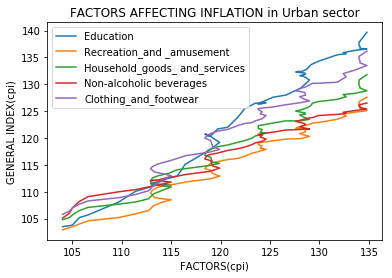

In [61]:
x = df.General_index
y1=df[factors[0]]
y2=df[factors[1]]
y3=df[factors[2]]
y4=df[factors[3]]
y5=df[factors[4]]
plt.plot(x, y1, label=factors[0])
plt.plot(x, y2, label=factors[1])
plt.plot(x, y3, label=factors[2])
plt.plot(x, y4, label=factors[3])
plt.plot(x, y5, label=factors[4])
plt.xlabel('FACTORS(cpi)')
plt.ylabel('GENERAL INDEX(cpi)')

plt.title("FACTORS AFFECTING INFLATION in Urban sector")

plt.legend()

plt.show()


In [62]:
import numpy as np
corelation=[]
list2=inputs_n1['General_index']
len(inputs_n1.columns)
for i in range(0,len(inputs_n1.columns)-5):
    list=inputs_n1.iloc[:,i]
    corelation.append(pearson_def(list, list2))
x=np.sort(corelation)
index2=np.argsort(corelation)
print(x)
print(index2)

[0.49987851 0.5988713  0.69721059 0.9210381  0.95776661 0.95781898
 0.96188848 0.97023023 0.97039479 0.97567852 0.97924164 0.97995397
 0.98303667 0.98444441 0.9845585  0.98496699 0.98514309 0.98610247
 0.98637134 0.98641706 0.98647515 0.98700772 0.9871866  0.98801035
        nan]
[ 6  8  7  2 24  4  9 21  5 18 13 22 20 19 23 10 11  3  0 14 16 15  1 12
 17]


In [63]:
factors1=[]
i=len(x)-1
while i>len(x)-6:
    factors1.append(inputs_n1.columns.values[index2[i]])
    i=i-1
print(factors1)

['Housing', 'Food_and_beverages', 'Meat_and_fish', 'Footwear', 'Clothing_and_footwear']


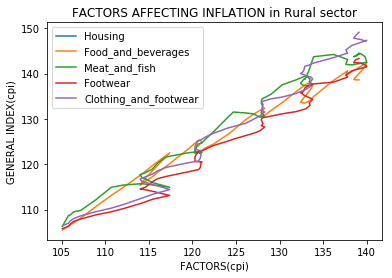

In [64]:
x = df1.General_index
y1=df1[factors1[0]]
y2=df1[factors1[1]]
y3=df1[factors1[2]]
y4=df1[factors1[3]]
y5=df1[factors1[4]]
plt.plot(x, y1, label=factors1[0])
plt.plot(x, y2, label=factors1[1])
plt.plot(x, y3, label=factors1[2])
plt.plot(x, y4, label=factors1[3])
plt.plot(x, y5, label=factors1[4])
plt.xlabel('FACTORS(cpi)')
plt.ylabel('GENERAL INDEX(cpi)')

plt.title("FACTORS AFFECTING INFLATION in Rural sector")

plt.legend()

plt.show()
